## Base: Airline passenger satisfaction

* https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [154]:
# df = pd.read_csv('train.csv')
df = pd.read_csv('test.csv')

In [155]:
df.shape

(25976, 25)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

## Limpeza dos Dados

### Dados Faltantes

In [157]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [158]:
# Remove id and Unnamed: 0
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [159]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Substituição dados faltantes em Arrival Delay in Minutes

In [160]:
media = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(media, inplace=True)

In [161]:
df['Arrival Delay in Minutes'].isnull().sum()

0

## Transformação dados categóricos

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
for i in df.columns:
  if(df[i].dtype=='object'):
    print(f'{i}: {df[i].unique()}')

Gender: ['Female' 'Male']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Business travel' 'Personal Travel']
Class: ['Eco' 'Business' 'Eco Plus']
satisfaction: ['satisfied' 'neutral or dissatisfied']


In [164]:
# Transforma os dados categóricos
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Customer Type'] = labelencoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = labelencoder.fit_transform(df['Type of Travel'])
df['Class'] = labelencoder.fit_transform(df['Class'])
df['satisfaction'] = labelencoder.fit_transform(df['satisfaction'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

## Normalização de atributos numéricos

In [166]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [167]:
scaler_cols = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']
print(scaler_cols)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [169]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0.817887,0,1,-1.035171,1.703853,0.621641,0.172143,0.797831,...,1.227138,1.259170,1.250974,1.161716,-1.035348,1.144063,1.298998,0.953810,0.781143,1
1,0,0,-0.239238,0,0,1.671443,-1.291598,-1.334871,0.172143,-1.542065,...,0.479907,0.479178,0.492730,0.311739,-0.247517,0.297077,1.298998,-0.382286,-0.393543,1
2,1,1,-1.296363,0,1,-1.003128,-0.542735,-1.987042,-0.535609,0.797831,...,-1.014556,0.479178,-1.782001,-0.538238,-1.035348,-1.396893,-0.974927,-0.382286,-0.393543,0
3,1,0,0.289325,0,0,2.186131,-2.040460,-1.987042,-1.951114,-0.762100,...,-1.761787,-1.860800,-1.782001,-2.238193,-0.247517,-2.243878,0.541023,-0.382286,-0.233358,1
4,0,0,0.619676,0,1,-0.011804,-0.542735,-0.030530,0.879895,0.017866,...,-1.014556,-1.080807,-1.023758,-1.388216,0.540315,-1.396893,0.541023,-0.382286,0.140405,1


## Modelos de Machine Learning

### Separação entre treino e teste

In [170]:
# Formato dataframe e series
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Randon Forest

In [172]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)

y_pred = forest.predict(X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)


Training Score 1.0
Testing Score 
 0.9532914153727704


### Métricas de avaliação

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

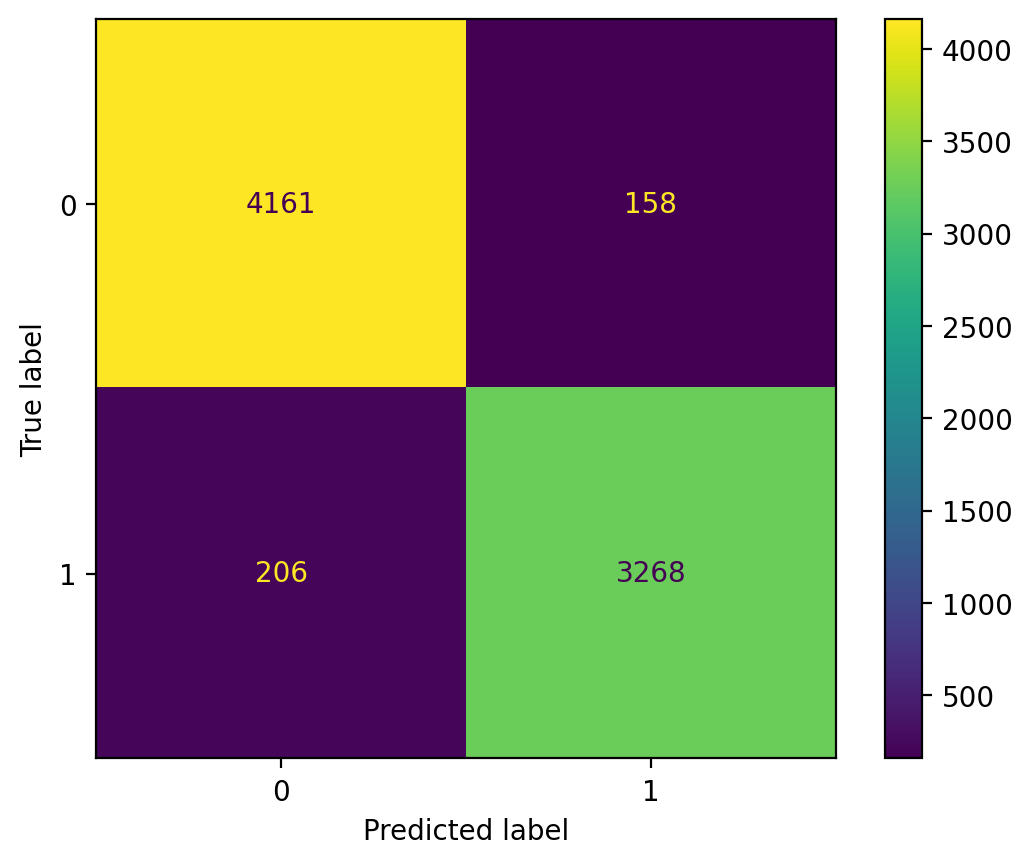

In [174]:
cm = confusion_matrix(y_test, y_pred)
# print(cm)
ConfusionMatrixDisplay(cm).plot()

In [175]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.953
Recall :0.94
Precision :0.95
F1-score :0.95


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4319
           1       0.95      0.94      0.95      3474

    accuracy                           0.95      7793
   macro avg       0.95      0.95      0.95      7793
weighted avg       0.95      0.95      0.95      7793



## Seleção de Características

In [177]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#### Heatmap com as correlações entre os atributos

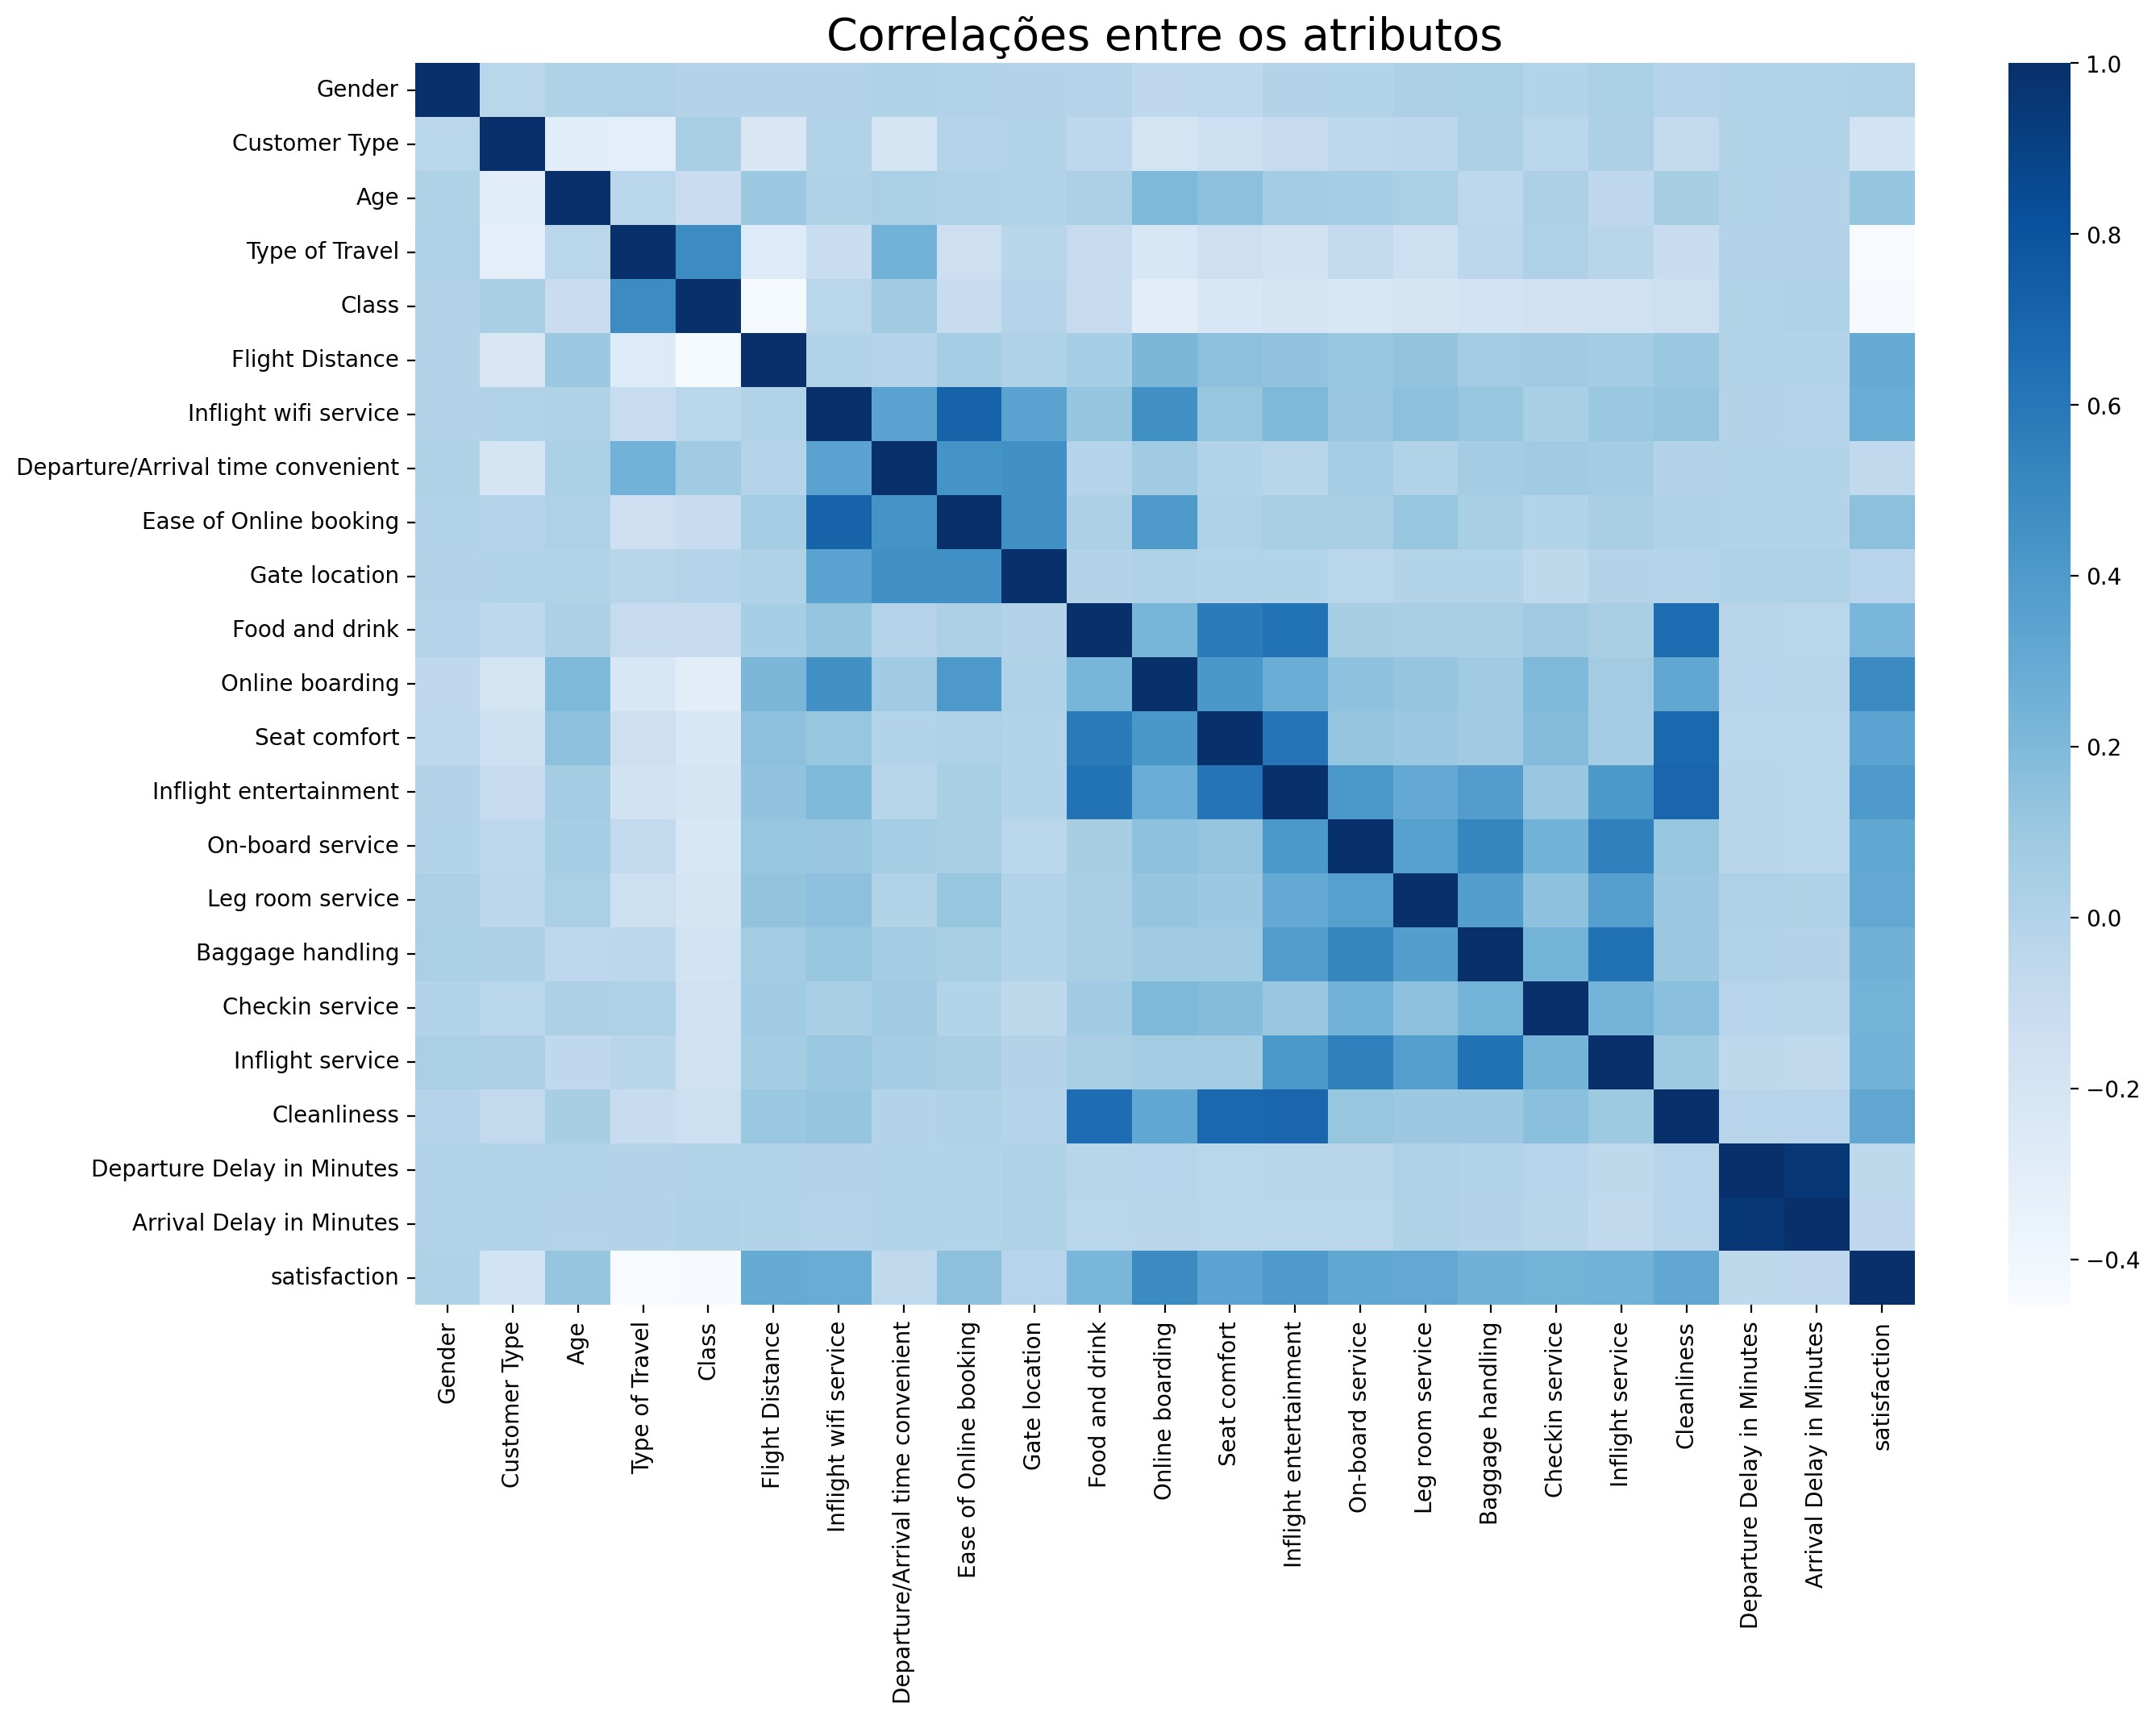

In [178]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues')
plt.title("Correlações entre os atributos", size = 20)
plt.show()

### Step forward feature selection

In [179]:
sfs = SFS(
    estimator=RandomForestClassifier(
        n_estimators=10),
    n_features_to_select=10,
    direction='forward',
    scoring='f1'
)

In [180]:
sfs = sfs.fit(X_train, y_train)

In [181]:
sfs_features = sfs.get_feature_names_out()
sfs_features

array(['Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Gate location', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'Baggage handling',
       'Checkin service'], dtype=object)

In [182]:
# Remove as características menos relevantes:
sfs_X_train = sfs.transform(X_train)
sfs_X_test = sfs.transform(X_test)

In [183]:
# Cria o modelo RandonForest
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(sfs_X_train, y_train)
forest_score = forest.score(sfs_X_train, y_train)
forest_test = forest.score(sfs_X_test, y_test)

y_pred = forest.predict(sfs_X_test)

In [184]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.947
Recall :0.94
Precision :0.94
F1-score :0.94


### Step Backward Feature Selection

In [185]:
sbs = SFS(
    estimator=RandomForestClassifier(
        n_estimators=10, n_jobs=4),
    n_features_to_select=10,
    direction='backward',
    scoring='f1',
    n_jobs=4
)

In [186]:
sbs = sbs.fit(X_train, y_train)

In [187]:
sbs_features = sbs.get_feature_names_out()
sbs_features

array(['Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Gate location', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'Baggage handling',
       'Inflight service'], dtype=object)

In [188]:
# Remove as características menos relevantes:
sbs_X_train = sbs.transform(X_train)
sbs_X_test = sbs.transform(X_test)

In [189]:
# Cria o modelo RandonForest
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(sbs_X_train, y_train)
forest_score = forest.score(sbs_X_train, y_train)
forest_test = forest.score(sbs_X_test, y_test)

y_pred = forest.predict(sbs_X_test)

In [190]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.945
Recall :0.94
Precision :0.94
F1-score :0.94


### Feature ranking with recursive feature elimination

In [191]:
from sklearn.feature_selection import RFE

In [192]:
rfe = RFE(estimator= RandomForestClassifier(
        n_estimators=10, n_jobs=4),
        n_features_to_select=10, step=1)

In [193]:
rfe = rfe.fit(X_train, y_train)

In [194]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True False  True False False  True
  True  True False  True False False False False False False]
[13  3  1  1  1  1  1  9  1  8 12  1  1  1  2  1  7  4  5  6 11 10]


In [195]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'Leg room service'],
      dtype='object')

In [196]:
# Remove as características menos relevantes:
rfe_X_train = rfe.transform(X_train)
rfe_X_test = rfe.transform(X_test)

In [197]:
# Cria o modelo RandonForest
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(rfe_X_train, y_train)
forest_score = forest.score(rfe_X_train, y_train)
forest_test = forest.score(rfe_X_test, y_test)

y_pred = forest.predict(rfe_X_test)

In [198]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.936
Recall :0.91
Precision :0.94
F1-score :0.93


### Similaridade das Features

In [199]:
# SFS
print(sfs_features)
# SBS
print(sbs_features)
# RFE
print(rfe_features.to_list())

['Customer Type' 'Type of Travel' 'Class' 'Inflight wifi service'
 'Gate location' 'Online boarding' 'Seat comfort' 'Inflight entertainment'
 'Baggage handling' 'Checkin service']
['Customer Type' 'Type of Travel' 'Class' 'Inflight wifi service'
 'Gate location' 'Online boarding' 'Seat comfort' 'Inflight entertainment'
 'Baggage handling' 'Inflight service']
['Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Leg room service']


#### Diagrama de Venn

In [200]:
!pip install venny4py

In [201]:
# import matplotlib_venn as venn
# import milkviz as mv
from venny4py.venny4py import *

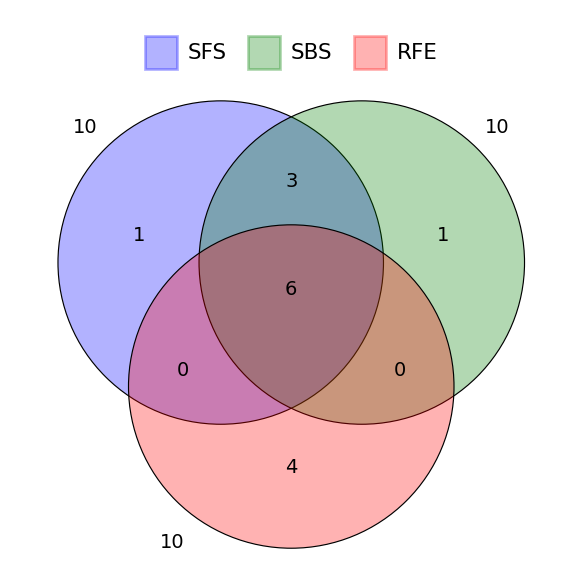

In [202]:
#dict of sets
sets = {
    'SFS': set(sfs_features),
    'SBS': set(sbs_features),
    'RFE': set(rfe_features)
}

venny4py(sets=sets)

##### Features similares entre as 3 abordagens

In [203]:
set(sfs_features).intersection(sbs_features,rfe_features)

{'Class',
 'Inflight entertainment',
 'Inflight wifi service',
 'Online boarding',
 'Seat comfort',
 'Type of Travel'}